Assignment No -05
Question No.01

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import statsmodels.api as sm

In [4]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
#checking null values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
df.drop('State',axis= 1)
#since for model building we need only numeric values therefore we have to remove state column

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [10]:
#feature Engineering [Renaming thr columns]
df1=df.rename({'R&D Spend':'RD','Marketing Spend':'Mrkt','Administration':'Admin','Profit':'Prof'},axis=1)
df1

,RD,Admin,Mrkt,State,Prof
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
#checking for duplicates
df1[df1.duplicated()]

,RD,Admin,Mrkt,State,Prof


In [12]:
#correlation Matrix
df1.corr()
# for profit and R&D Spend the value is 0.97, so we can say there is strong correlation between profit and R&D Spend.

,RD,Admin,Mrkt,Prof
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mrkt,0.724248,-0.032154,1.000000,0.747766
Prof,0.972900,0.200717,0.747766,1.000000


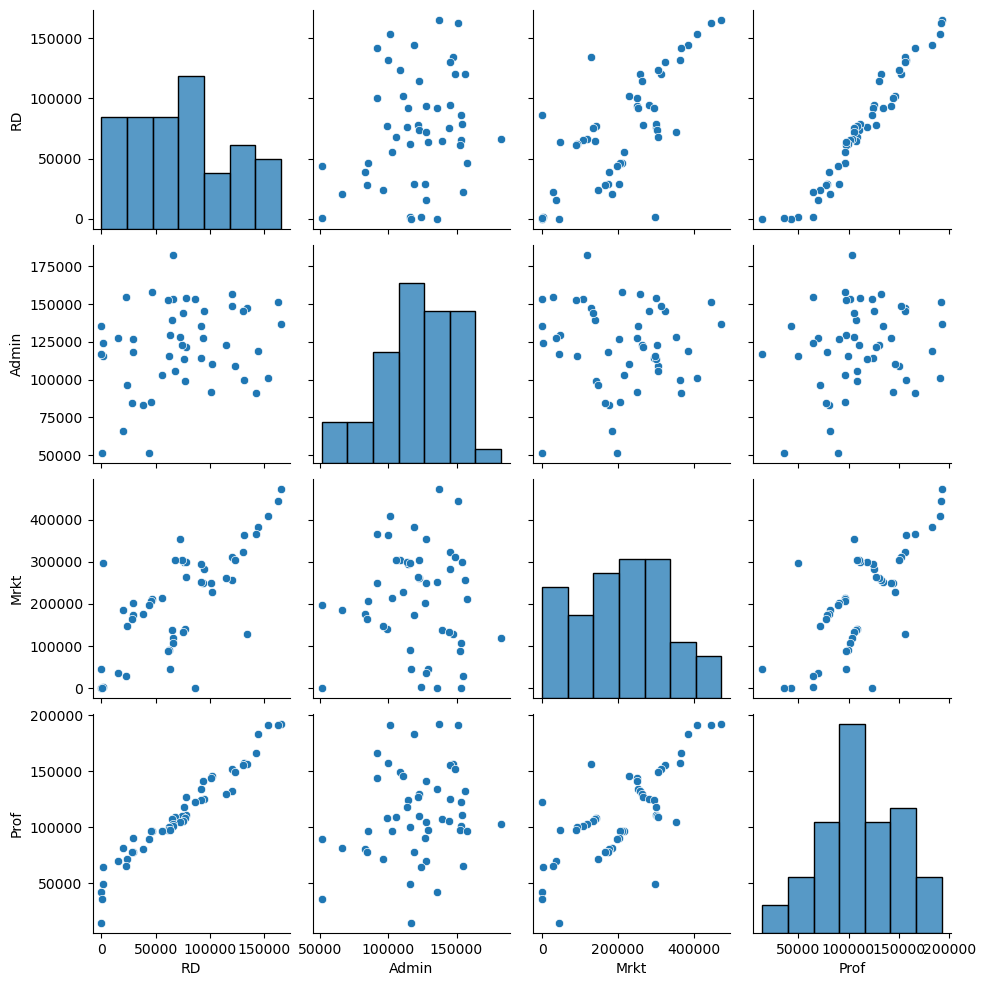

In [13]:
sns.pairplot(df1)

In [14]:
# model building
model=smf.ols('Prof~RD+Admin+Mrkt',data=df1).fit()

In [15]:
model.params

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
Mrkt             0.027228
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Prof   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        19:52:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mrkt           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
print('t values are :\n',model.tvalues,'P values are',model.pvalues)

t values are :
 Intercept     7.626218
RD           17.846374
Admin        -0.525507
Mrkt          1.655077
dtype: float64 P values are Intercept    1.057379e-09
RD           2.634968e-22
Admin        6.017551e-01
Mrkt         1.047168e-01
dtype: float64


In [18]:
#since the pvalues of Admin and Mrkt >0.05,hence we build SLR and MLR
#for variables Admin and Mrkt.


In [19]:
# Coefficient of determination : R squared values
print('The values of R square:\n',model.rsquared,'\n','R squared _adjacet values :\n',model.rsquared_adj)

The values of R square:
 0.9507459940683246 
 R squared _adjacet values :
 0.9475337762901719


In [20]:
# R squared adjacent value is = 94.75% , Hence we can say model is really good

Simple Linear Regression Models:
building SLR and MLR models for insignificant Variables 'Admin' and 'Mrkt'
Also finding their Tvalues and Pvalues


In [21]:
ml_p=smf.ols('Prof~Admin',data=df1).fit()

In [22]:
print('Tvalues are:\n',ml_p.tvalues,'pvalues are:\n',ml_p.pvalues)

Tvalues are:
 Intercept    3.040044
Admin        1.419493
dtype: float64 pvalues are:
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [23]:
ml_p=smf.ols('Prof~Mrkt',data=df1).fit()
print('tTvalues are :',ml_p.tvalues,'pvalues are :',ml_p.pvalues)

tTvalues are : Intercept    7.808356
Mrkt         7.802657
dtype: float64 pvalues are : Intercept    4.294735e-10
Mrkt         4.381073e-10
dtype: float64


In [24]:
ml_p=smf.ols('Prof~Admin+Mrkt',data=df1).fit()
print('Tvalues are ;\n',ml_p.tvalues,'\n','Pvalues are :\n',ml_p.pvalues)

Tvalues are ;
 Intercept    1.142741
Admin        2.467779
Mrkt         8.281039
dtype: float64 
 Pvalues are :
 Intercept    2.589341e-01
Admin        1.729198e-02
Mrkt         9.727245e-11
dtype: float64


In [25]:
# Calculating VIF
# VIF=1/(1-rsquare)

In [26]:
rsq_RD=smf.ols('RD~Mrkt+Admin',data=df1).fit().rsquared
vif_RD=1/(1-rsq_RD)
rsq_Mrkt=smf.ols('Mrkt~Admin+RD',data=df1).fit().rsquared
vif_Mrkt=1/(1-rsq_Mrkt)
rsq_Admin=smf.ols('Admin~Mrkt+RD',data=df1).fit().rsquared
vif_Admin=1/(1-rsq_Admin)
d={'Variable':['RD','Mrkt','Admin'],'VIF':[vif_Admin,vif_Mrkt,vif_RD]}
d1=pd.DataFrame(d)
print(d1)

  Variable       VIF
0       RD  1.175091
1     Mrkt  2.326773
2    Admin  2.468903


In [27]:
#VIF of all the variables <20 therefore we can say that there is No  Collinearity.

In [28]:
#Residual Analysis
#Test for Normality of Residuals(Q-Q plot) using residual model
#(model.resid)

In [29]:
model=smf.ols('Prof~Mrkt+RD+Admin',data=df1).fit()

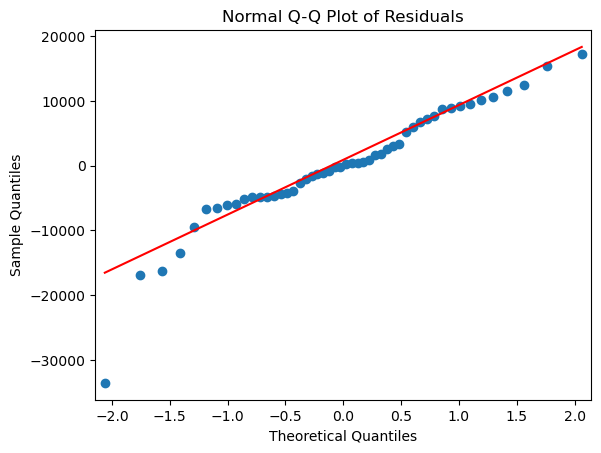

In [30]:
qqplot=sm.qqplot(model.resid,line = 'q')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

In [31]:
list[np.where(model.resid <-30000)]

list[array([49], dtype=int64)]

In [32]:
# outlier value exists below -30000 so that we use (model.resid<-30000)

# Residual Plot for Homoscedasticity or Heteroscedasticity

In [33]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
#to get standardized values of df1

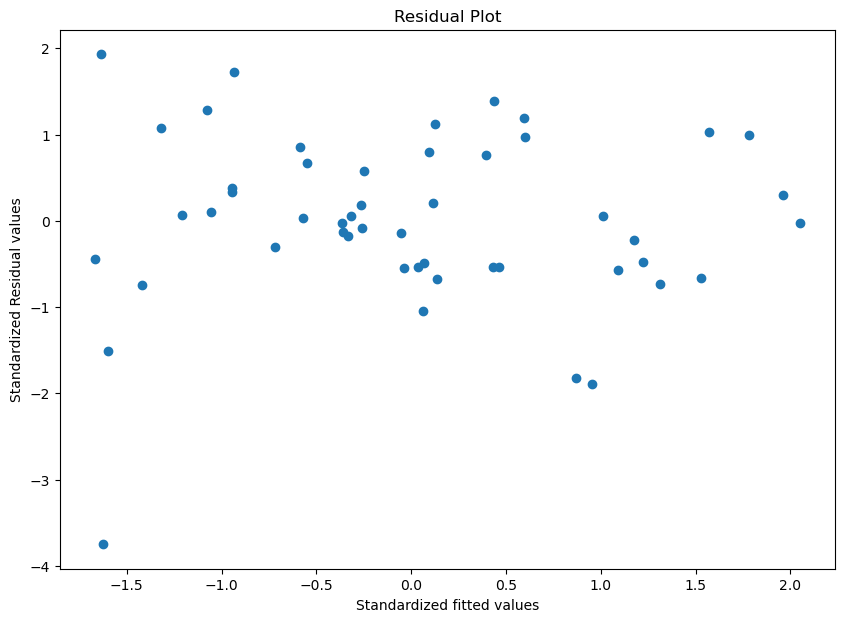

In [34]:
plt.figure(figsize=(10,7))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized Residual values')
plt.show()

# Residual VS Regressors

eval_env: 1


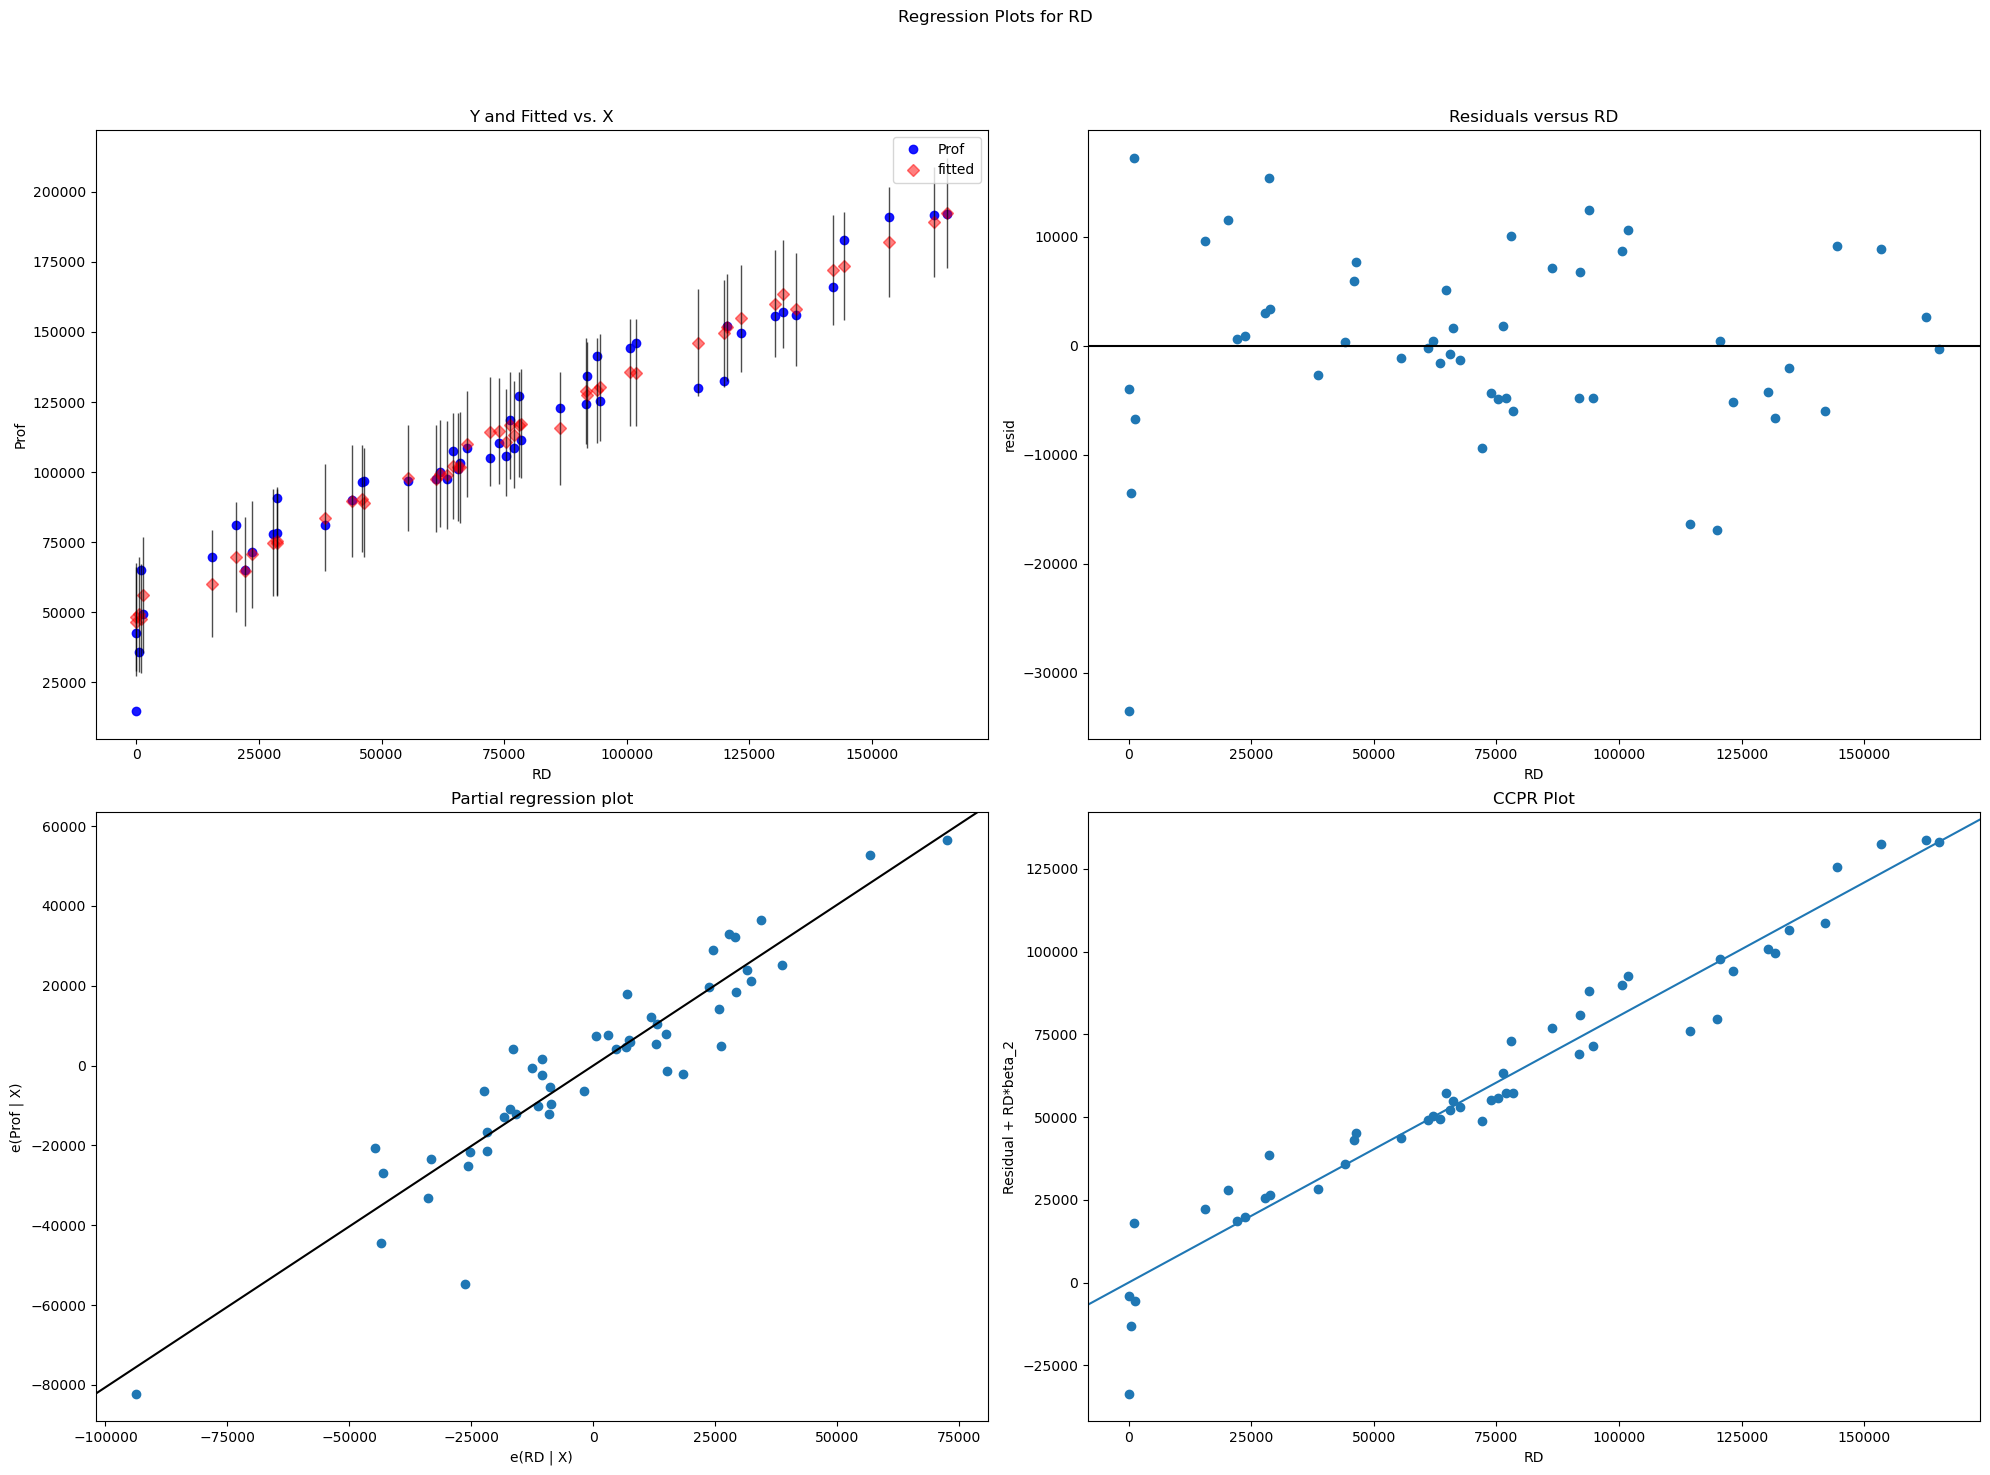

In [35]:
fig=plt.figure(figsize=(20,15))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show()

eval_env: 1


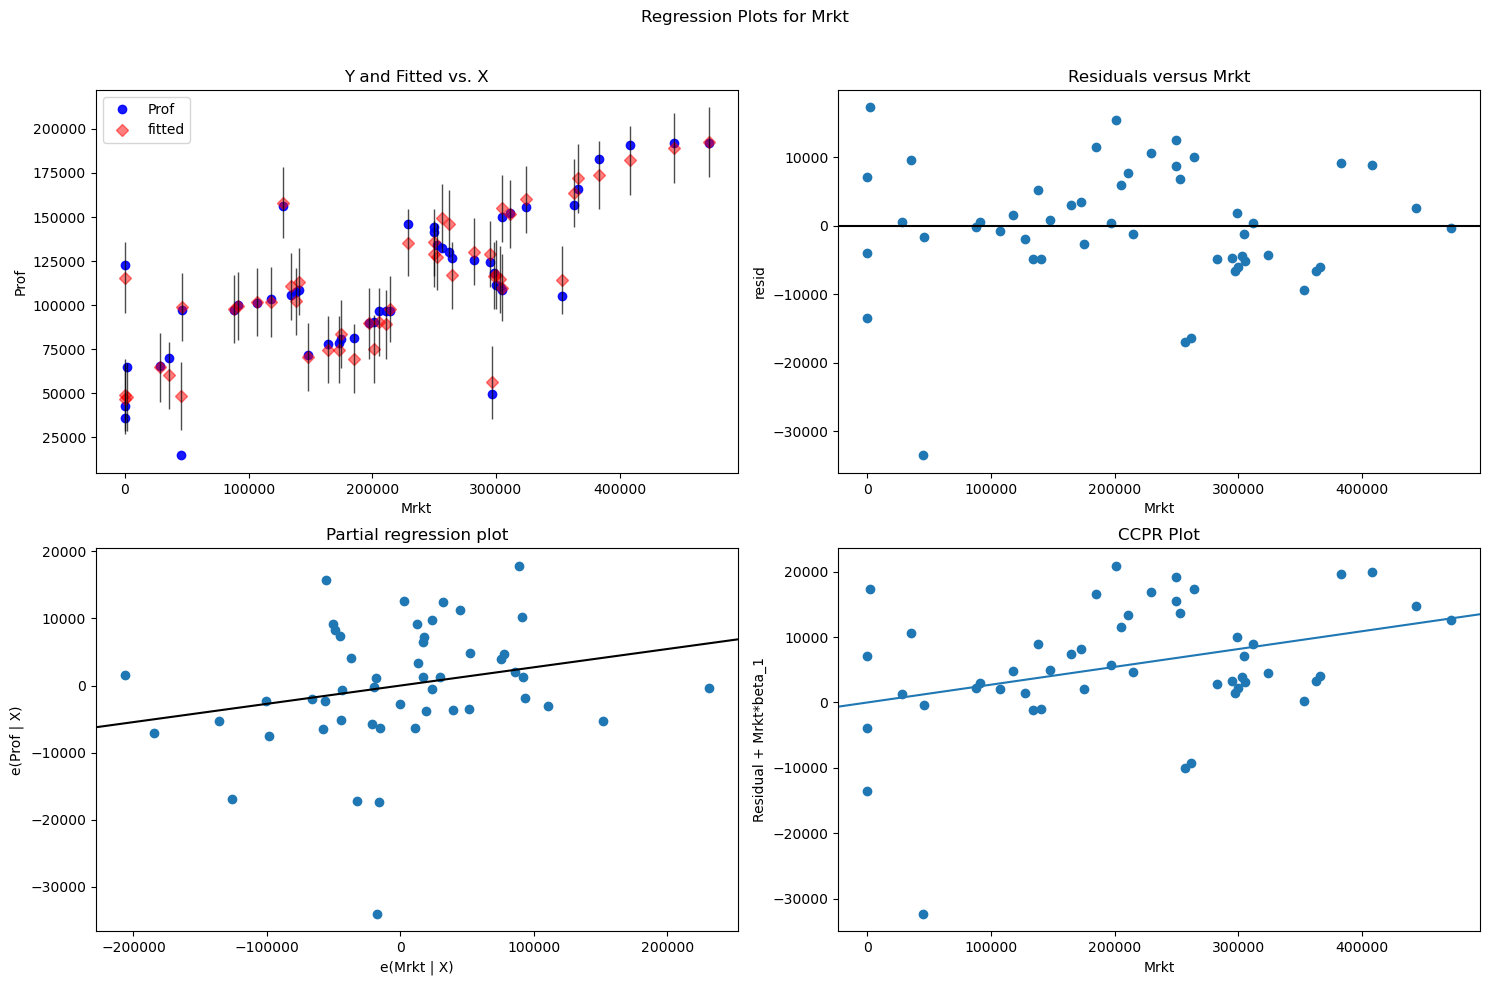

In [36]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,"Mrkt",fig=fig)
plt.show()

eval_env: 1


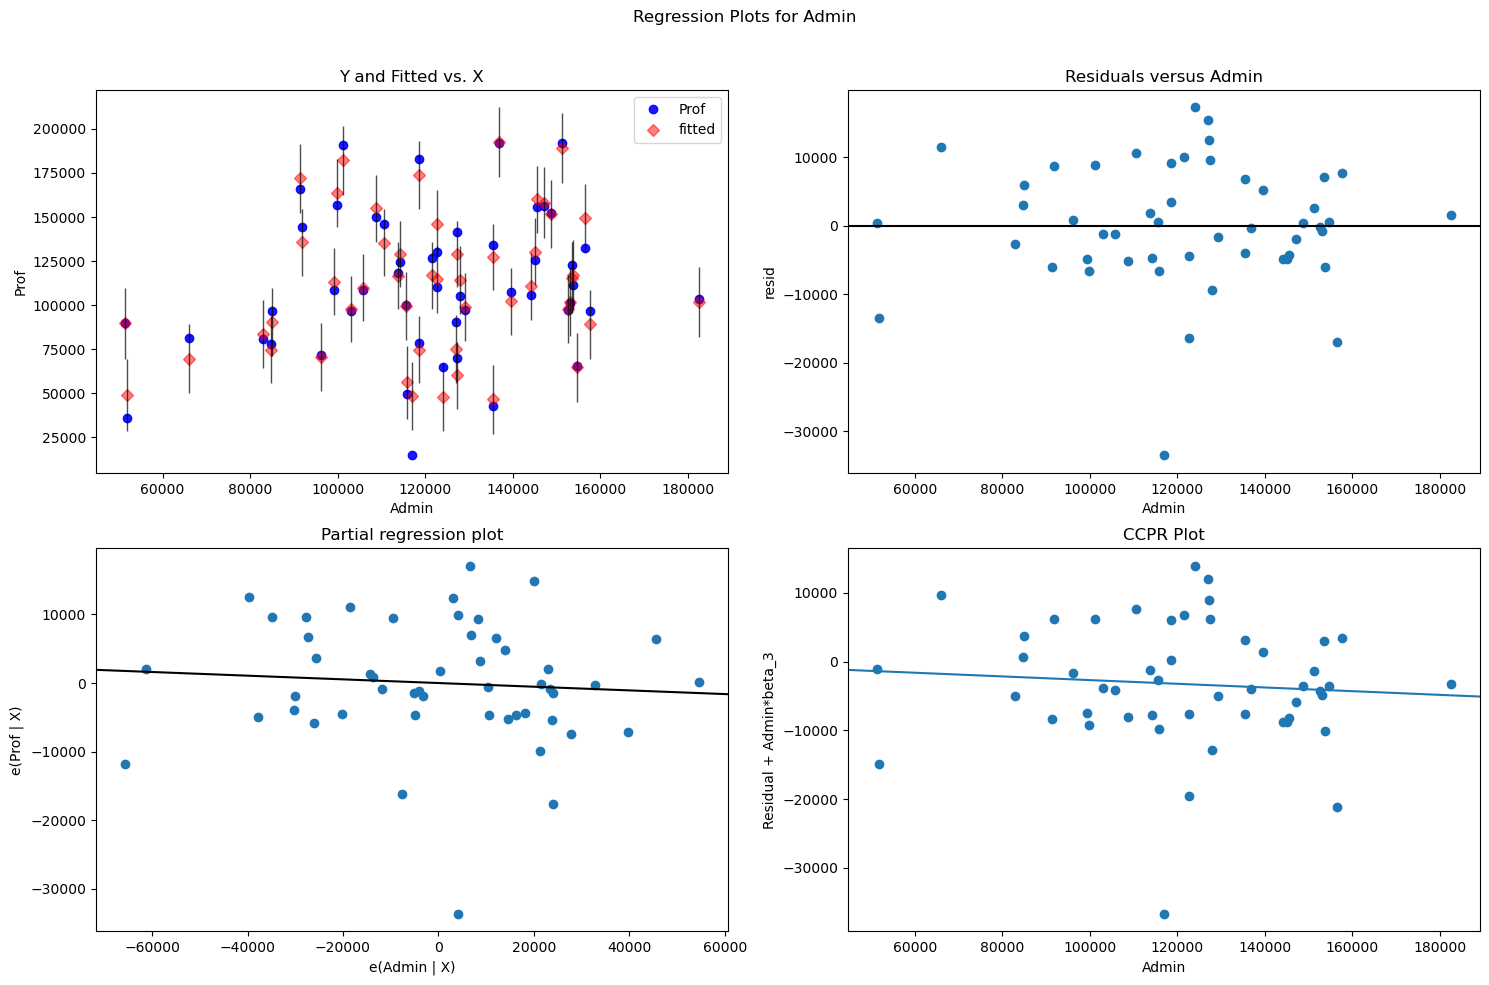

In [37]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,"Admin",fig=fig)
plt.show()

# Cooks Distance

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence=model.get_influence()
(c,_) = model_influence.cooks_distance

In [39]:
# Plot the influencers values using stem plot

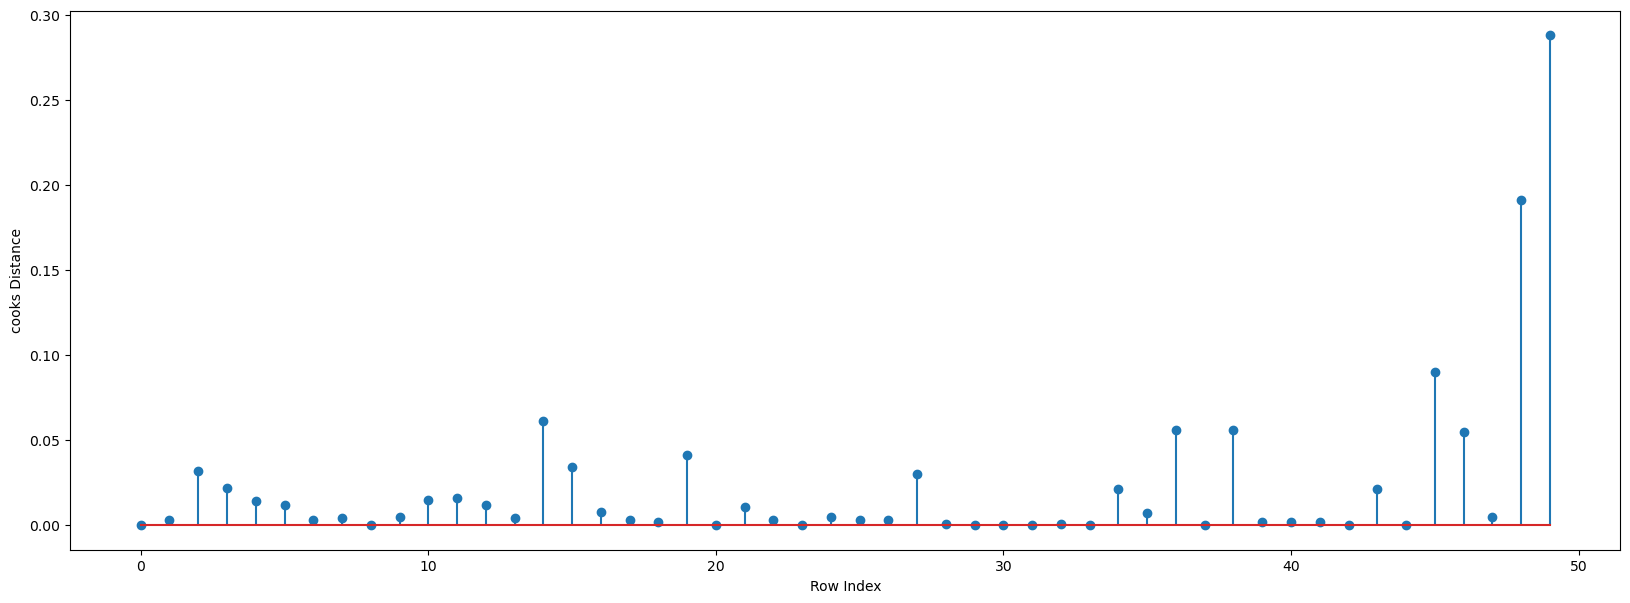

In [40]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('cooks Distance')
plt.show()

In [41]:
# index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(49, 0.2880822927543274)

In [42]:
df1.shape

(50, 5)

In [43]:
k= df1.shape[1]
n=df1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.36

In [44]:
df1

,RD,Admin,Mrkt,State,Prof
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


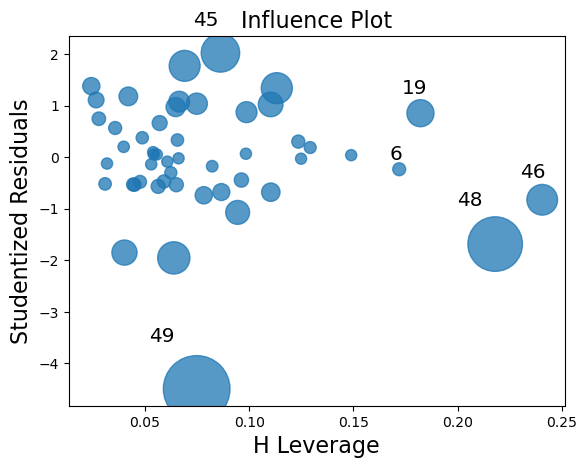

In [45]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
influence_plot(model,alhpa=0.5)

#y=[i for i in range(-2,8)]
#x=[Leverage_cutoff for i in range (10)]
#plt.plot(x,y,'r+')
plt.show()

In [46]:
df1[df1.index.isin([49])]

,RD,Admin,Mrkt,State,Prof
49,0.0,116983.8,45173.06,California,14681.4


In [47]:
df2=df1.drop(df1.index[49],axis=0).reset_index()
df2.drop(['index'],axis=1,inplace=True)

In [48]:
df2

,RD,Admin,Mrkt,State,Prof
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# building model 2


In [49]:
#Exclude variable "Mrkt" and generate R-Squared and AIC values

In [50]:
final_Admin=smf.ols('Prof~RD+Admin',data=df2).fit()

In [51]:
(final_Admin.rsquared,final_Admin.aic,final_Admin.bic)

(0.9584519070123048, 1022.0654576388338, 1027.7409185331658)

In [52]:
#Exclude variable "Admin" and generate R-Squared and AIC values

In [53]:
final_Mrkt=smf.ols('Prof~Mrkt+RD',data=df2).fit()

In [54]:
(final_Mrkt.rsquared,final_Mrkt.aic,final_Mrkt.bic)

(0.9610856807456628, 1018.8564801588341, 1024.531941053166)

In [55]:
# Comparing above R-Squared and AIC values, model 'final_Mrkt' has high R- square and low AIC value 
# Hence include variable 'Mrkt' so that multi collinearity problem would be resolved.

# cooks distance

In [56]:
model_influence_Mrkt=final_Mrkt.get_influence()
(c_M,_)=model_influence_Mrkt.cooks_distance

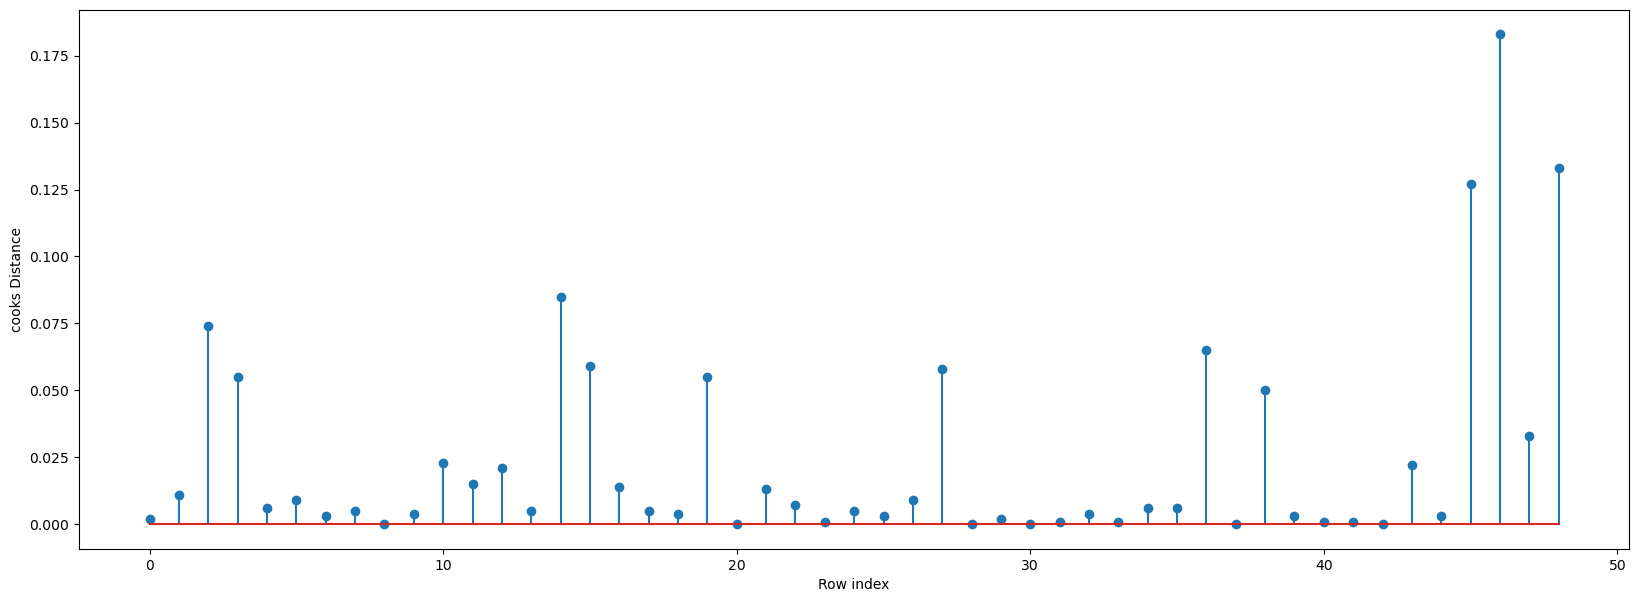

In [57]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c_M,3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [58]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [59]:
#check the accuracy of the model
final_Mrkt=smf.ols('Prof~RD+Mrkt+Admin',data=df2).fit()

In [60]:
final_Mrkt.rsquared,final_Mrkt.aic

(0.9613162435129847, 1020.5652974526367)

In [61]:
#Model Prediction for new dataset
# New data for prediction
new_data=pd.DataFrame({'Mrkt':250000,'RD':200000,'Admin':350000},index=[1])
new_data

,Mrkt,RD,Admin
1,250000,200000,350000


In [62]:
final_Mrkt.predict(new_data)

1    207520.741579
dtype: float64

In [63]:
final_Mrkt.predict(df2.iloc[0:4])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
dtype: float64

In [64]:
pred_y=final_Mrkt.predict(df2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

Table containing R^2 value for each prepared model

In [65]:
d2={'prep_models':['Model','final_model'],'Rsquared':[model.rsquared,final_Mrkt.rsquared]}
table=pd.DataFrame(d2)
table

,prep_models,Rsquared
0,Model,0.950746
1,final_model,0.961316


# Question no 02

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [70]:
toyota=pd.read_csv('ToyotaCorolla (8).csv')
toyota

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [71]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [72]:
toyota.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [73]:
toyota.corr()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.165067,0.185326,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.133182,-0.148359,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.302150,-0.036197,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.050884,0.092424,0.089614
MetColor,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.034921,0.085243,0.057929
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,-0.069321,-0.027654,0.057249
CC,0.165067,-0.133182,0.302150,0.050884,0.034921,-0.069321,1.000000,0.126768,0.651450
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.126768,1.000000,0.302618
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.651450,0.302618,1.000000


In [81]:
sns.pairplot(toyota)

In [77]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Weight',data=toyota).fit()

In [78]:
#Coefficients
model.params

Intercept   -6183.284596
Age          -122.093897
KM             -0.016755
HP             32.763412
CC             -1.670400
Doors         -58.761269
Weight         22.771846
dtype: float64

In [79]:
#tvalues and Pvalues
(model.tvalues,model.pvalues)

(Intercept    -6.231243
 Age         -47.092382
 KM          -13.013696
 HP           12.868126
 CC           -5.996549
 Doors        -1.502833
 Weight       21.411329
 dtype: float64,
 Intercept     6.076018e-10
 Age          5.318000e-293
 KM            1.135029e-36
 HP            6.189106e-36
 CC            2.548902e-09
 Doors         1.331030e-01
 Weight        1.945520e-88
 dtype: float64)

In [80]:
np.round(model.pvalues,5)

Intercept    0.0000
Age          0.0000
KM           0.0000
HP           0.0000
CC           0.0000
Doors        0.1331
Weight       0.0000
dtype: float64

In [82]:
# Rsquared values
model.rsquared,model.rsquared_adj

(0.8652394873023741, 0.8646736628963658)

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1529.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:02:54   Log-Likelihood:                -12368.
No. Observations:                1436   AIC:                         2.475e+04
Df Residuals:                    1429   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6183.2846    992.304     -6.231      0.000   -8129.813   -4236.757
Age         -122.0939      2.593    -47.092      0.000    -127.180    -117.008
KM            -0.0168      0.001    -13.014      0.000      -0.019      -0.014
HP            32.7634      2.546     12.868      0.000      27.769      37.758
CC            -1.6704      0.279     -5.997      0.000      -2.217      -1.124
Doors        -58.7613     39.100     -1.503      0.133    -135.461      17.939
Weight        22.7718      1.064     21.411      0.000      20.686      24.858
==============================================================================
Omnibus:                      361.059   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4710.334
Skew:                          -0.790   Prob(JB):                         0.00
Kurtosis:                      11.731   Cond. No.                     2.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
ml_cc=smf.ols('Price~CC',data=toyota).fit()

In [86]:
print(ml_cc.tvalues,'\n',ml_cc.pvalues)

Intercept    7.182083
CC           6.337726
dtype: float64 
 Intercept    1.099119e-12
CC           3.115643e-10
dtype: float64


In [88]:
toyota.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [89]:
ml_doors=smf.ols('Price~Doors',data=toyota).fit()

In [ ]:
print(ml_doors.tvalues,'\n',ml_doors.pvalues)

In [90]:
ml_KM=smf.ols('Price~KM',data=toyota).fit()
    

In [91]:
print(ml_KM.tvalues,'\n',ml_KM.pvalues)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [95]:
ml_AGE=smf.ols('Price~Age',data=toyota).fit()

In [96]:
print(ml_AGE.tvalues,'\n',ml_AGE.pvalues)

Intercept    138.907847
Age          -68.978267
dtype: float64 
 Intercept    0.0
Age          0.0
dtype: float64


In [97]:
ml_HP=smf.ols('Price~HP',data=toyota).fit()


In [98]:
print(ml_HP.tvalues,'\n',ml_HP.pvalues)

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [102]:
ml_MC=smf.ols('Price~MetColor',data=toyota).fit()
#t and p-values
print(ml_MC.tvalues, '\n', ml_MC.pvalues)

Intercept    60.888569
MetColor      4.148702
dtype: float64 
 Intercept    0.000000
MetColor     0.000035
dtype: float64


In [103]:
ml_WT=smf.ols('Price~Weight',data=toyota).fit()
print(ml_WT.tvalues,'\n',ml_WT.pvalues)

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


In [106]:
ml_CD=smf.ols('Price~CC+Doors+Age+KM+HP+Weight',data=toyota).fit()


In [107]:
print(ml_CD.tvalues,'\n',ml_CD.pvalues)

Intercept    -6.231243
CC           -5.996549
Doors        -1.502833
Age         -47.092382
KM          -13.013696
HP           12.868126
Weight       21.411329
dtype: float64 
 Intercept     6.076018e-10
CC            2.548902e-09
Doors         1.331030e-01
Age          5.318000e-293
KM            1.135029e-36
HP            6.189106e-36
Weight        1.945520e-88
dtype: float64


In [108]:
ml_CD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1529.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:10:21   Log-Likelihood:                -12368.
No. Observations:                1436   AIC:                         2.475e+04
Df Residuals:                    1429   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6183.2846    992.304     -6.231      0.000   -8129.813   -4236.757
CC            -1.6704      0.279     -5.997      0.000      -2.217      -1.124
Doors        -58.7613     39.100     -1.503      0.133    -135.461      17.939
Age         -122.0939      2.593    -47.092      0.000    -127.180    -117.008
KM            -0.0168      0.001    -13.014      0.000      -0.019      -0.014
HP            32.7634      2.546     12.868      0.000      27.769      37.758
Weight        22.7718      1.064     21.411      0.000      20.686      24.858
==============================================================================
Omnibus:                      361.059   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4710.334
Skew:                          -0.790   Prob(JB):                         0.00
Kurtosis:                      11.731   Cond. No.                     2.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

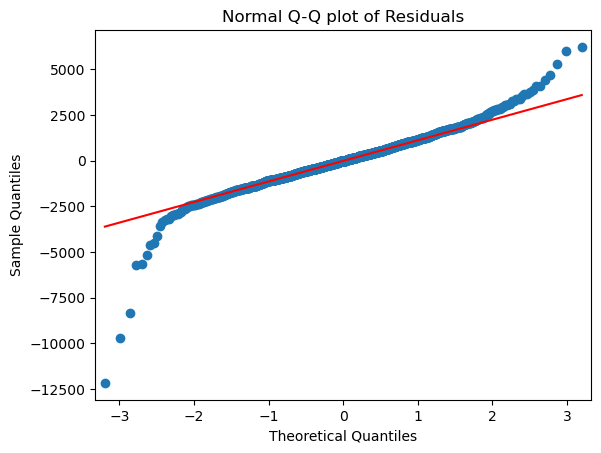

In [111]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [110]:
np.random.normal(400,30,50)

array([374.53660703, 438.65049438, 340.34003164, 376.50969769,
       396.55377601, 435.98658232, 389.32668908, 407.421608  ,
       426.2220394 , 354.01686878, 353.45643202, 367.82966439,
       362.98502348, 394.2565686 , 379.87370884, 431.35065812,
       372.72551969, 392.86931367, 400.76198999, 401.75311253,
       336.59930203, 402.6002655 , 359.91449815, 449.92945032,
       407.55116156, 416.46176011, 361.18252504, 430.64480187,
       374.8503039 , 453.44993847, 394.97828933, 397.03895988,
       376.93507832, 367.79099469, 376.71229285, 410.3866684 ,
       442.93533946, 381.98447502, 382.88803112, 414.55272604,
       464.81805593, 421.8536127 , 420.60188125, 394.75930946,
       356.29182475, 341.21090817, 422.13553532, 401.45892495,
       374.65425809, 351.36554995])

In [112]:
sample=np.random.uniform(25,30,1000)
sample

array([27.42527929, 26.17002925, 27.15430466, 27.70930597, 26.2931337 ,
       25.20313648, 26.99977431, 27.85963696, 29.24011006, 25.6694133 ,
       27.09447638, 28.11539759, 29.54069847, 28.4773198 , 28.71080541,
       28.5796543 , 26.98112508, 28.55729076, 27.79035096, 27.42816596,
       26.74304607, 25.54383999, 28.75013239, 29.07451913, 26.71861791,
       27.28591272, 29.46888064, 26.67295284, 27.910679  , 26.41400957,
       27.40820494, 27.99738491, 26.83196241, 29.98106299, 25.36818507,
       26.19520388, 27.60096864, 27.63004766, 29.57519079, 28.8767996 ,
       26.47639464, 28.74401649, 26.9462224 , 26.63828549, 26.44711051,
       28.56569048, 28.16910069, 25.98094658, 27.0952709 , 25.0853739 ,
       27.10763563, 26.29098868, 26.86813217, 29.46903426, 29.54498991,
       26.48375388, 25.48097041, 26.8241762 , 29.21960935, 29.30583744,
       25.73480275, 28.91554765, 26.32069157, 28.62208584, 25.03839703,
       29.80970053, 26.20184519, 25.00139178, 27.19020526, 26.30

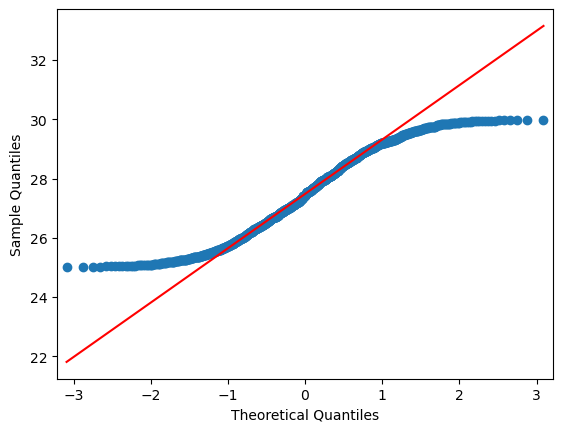

In [113]:
qqplot=sm.qqplot(sample,line='q')
plt.show()


In [114]:
sample=np.random.uniform(400,30,1000)
sample

array([326.68545449, 293.92317441, 121.73987489, 105.15041176,
       304.62781405, 137.73271752, 355.84006086, 182.30445205,
       219.50856033, 320.32282613, 394.51328992, 236.86568386,
       390.57564499, 125.14705966, 232.64848849, 289.32978154,
       337.26813344, 238.21392281,  30.35775842, 154.43814097,
       293.04917577, 384.41446336, 392.0861236 , 255.04750902,
       359.75361719, 165.35343463,  95.31050044, 184.67694721,
        47.85246626, 259.01714749, 139.62995261,  39.62041305,
       254.01094859, 138.4044484 , 178.05423231, 295.15340758,
       319.58896968, 268.92806761, 182.09223783, 349.41409456,
       333.03547435, 326.76381367,  37.740033  , 153.30346792,
       119.91963481, 162.67557117,  83.47720565, 139.68613991,
       276.81177754, 250.9314798 , 221.15492125, 271.33459177,
       120.02547186, 377.36834486, 153.31784951, 187.02164609,
       228.071489  , 150.11234953, 114.64272293,  79.24849033,
       200.34047004,  42.22144893, 236.92231318, 111.88

In [115]:
residuals=model.resid
residuals

0      -2682.114910
1      -1997.298090
2      -2198.405227
3       -848.843345
4      -1833.502346
           ...     
1431   -1359.007188
1432    2554.122773
1433      53.786359
1434   -1319.983068
1435   -3592.927717
Length: 1436, dtype: float64

In [116]:
residuals.mean()

4.062253018645933e-09

In [117]:
list(np.where(model.resid<-5000))

[array([191, 192, 221, 601, 654, 960], dtype=int64)]

In [118]:
def standard_values(vals):
    return (vals-vals.mean())/vals.std()

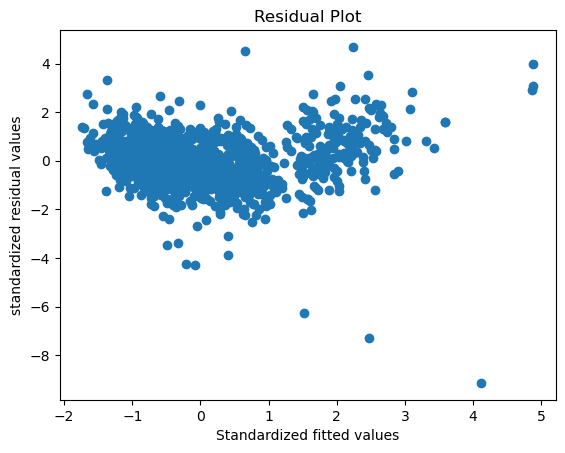

In [119]:
plt.scatter(standard_values(model.fittedvalues), standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


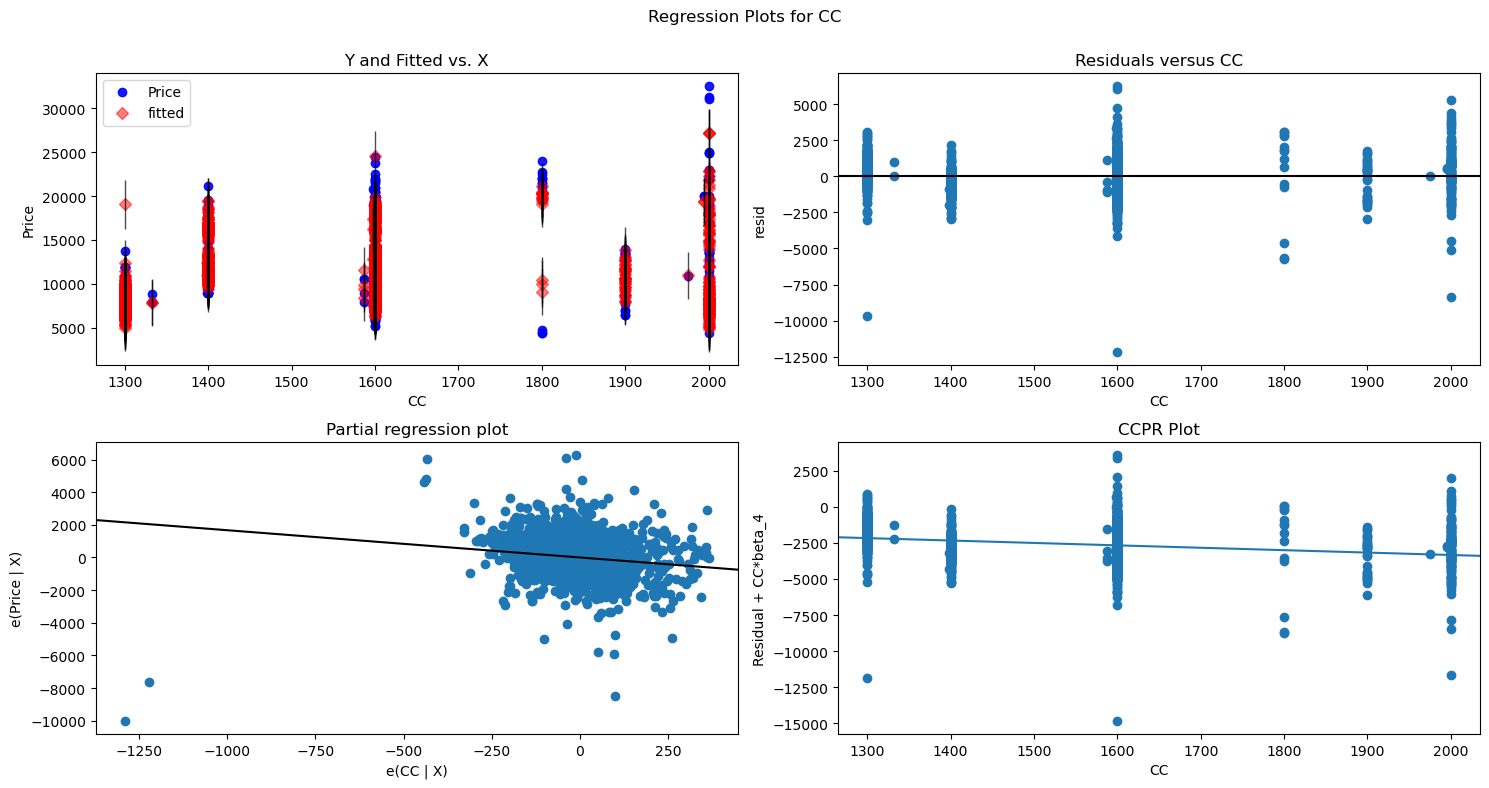

In [120]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'CC', fig=fig)
plt.show()

eval_env: 1


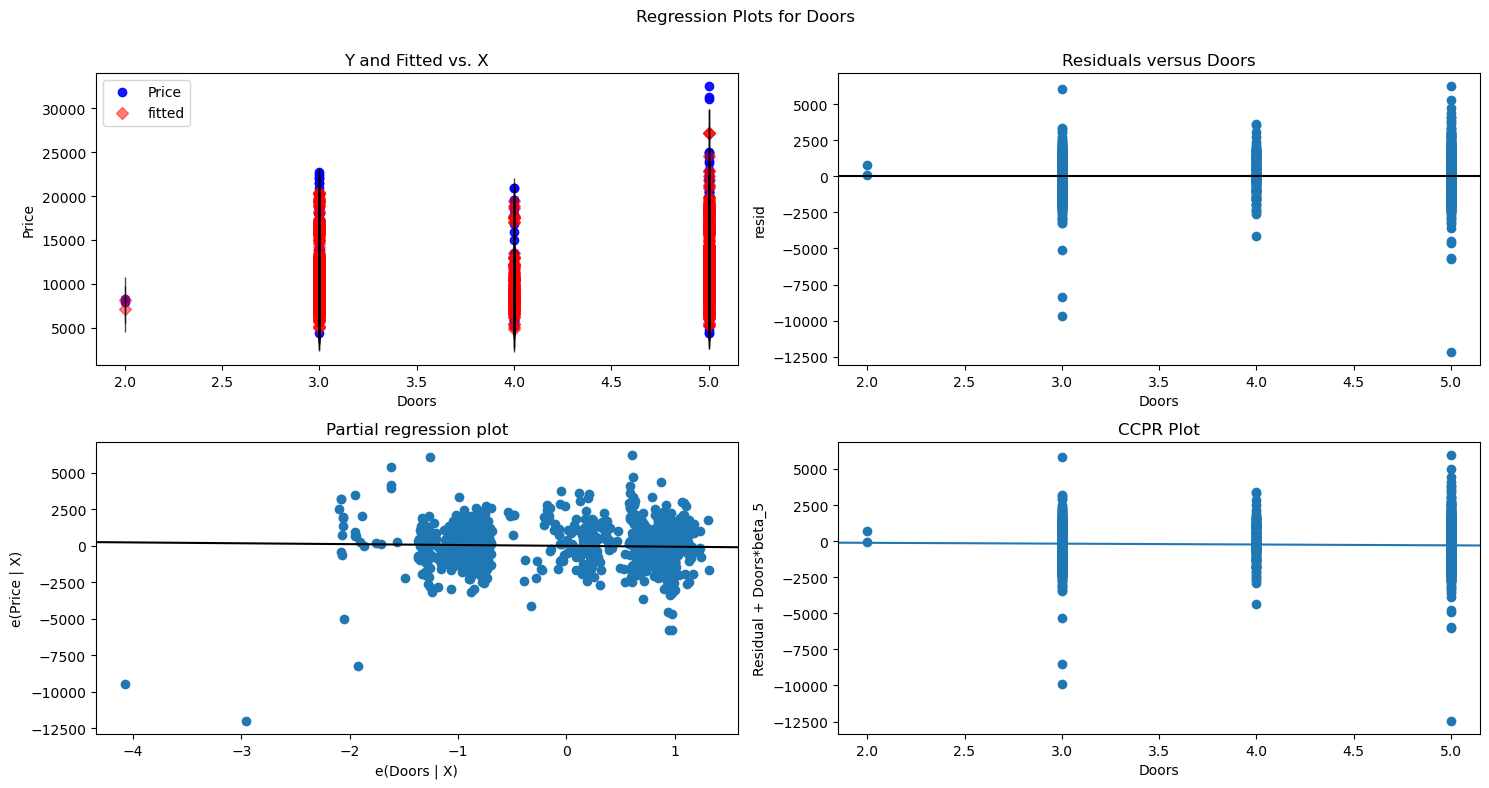

In [121]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

eval_env: 1


<Figure size 1500x800 with 0 Axes>

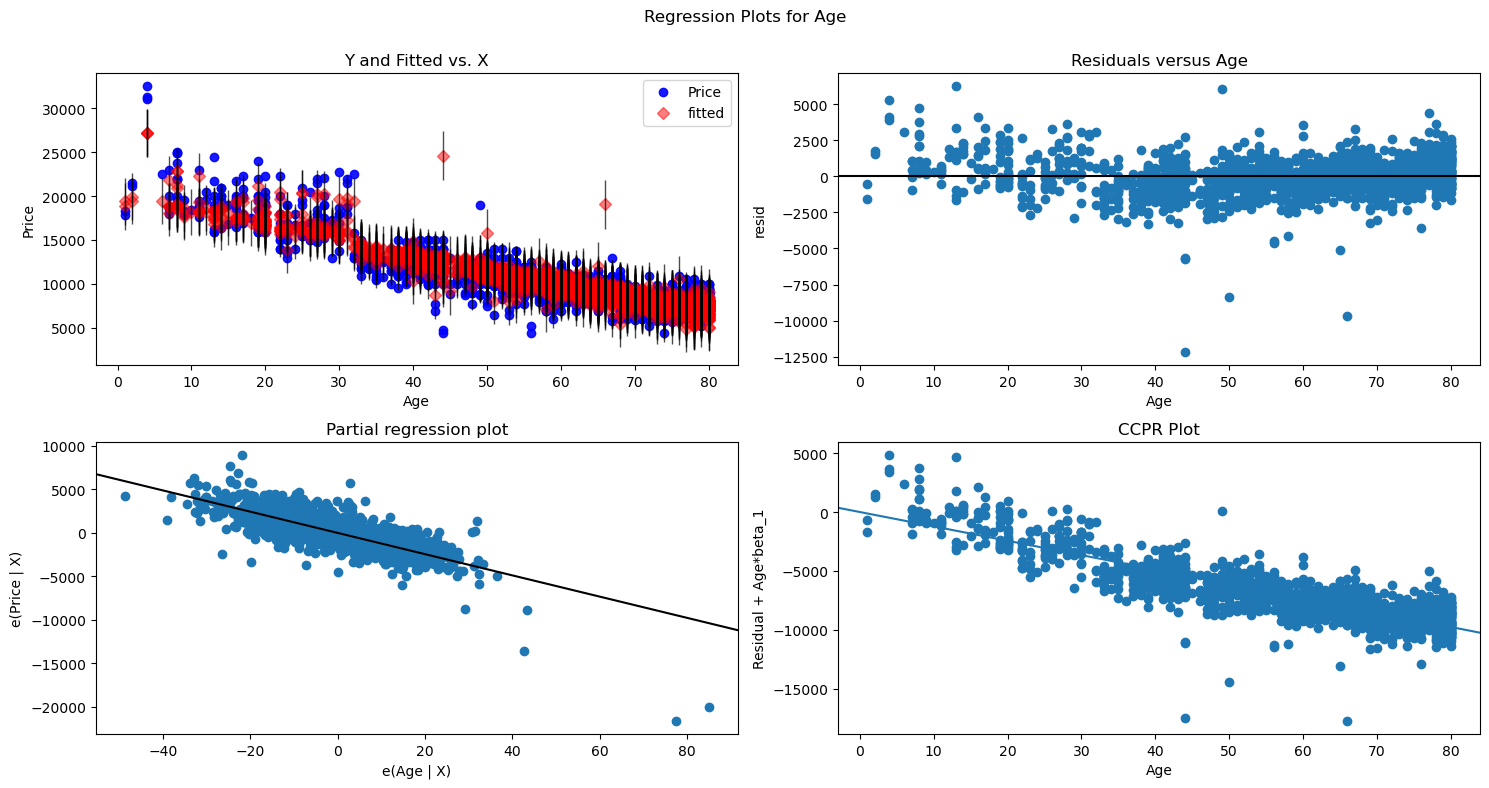

In [123]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Age', fig=fig)
plt.show()

eval_env: 1


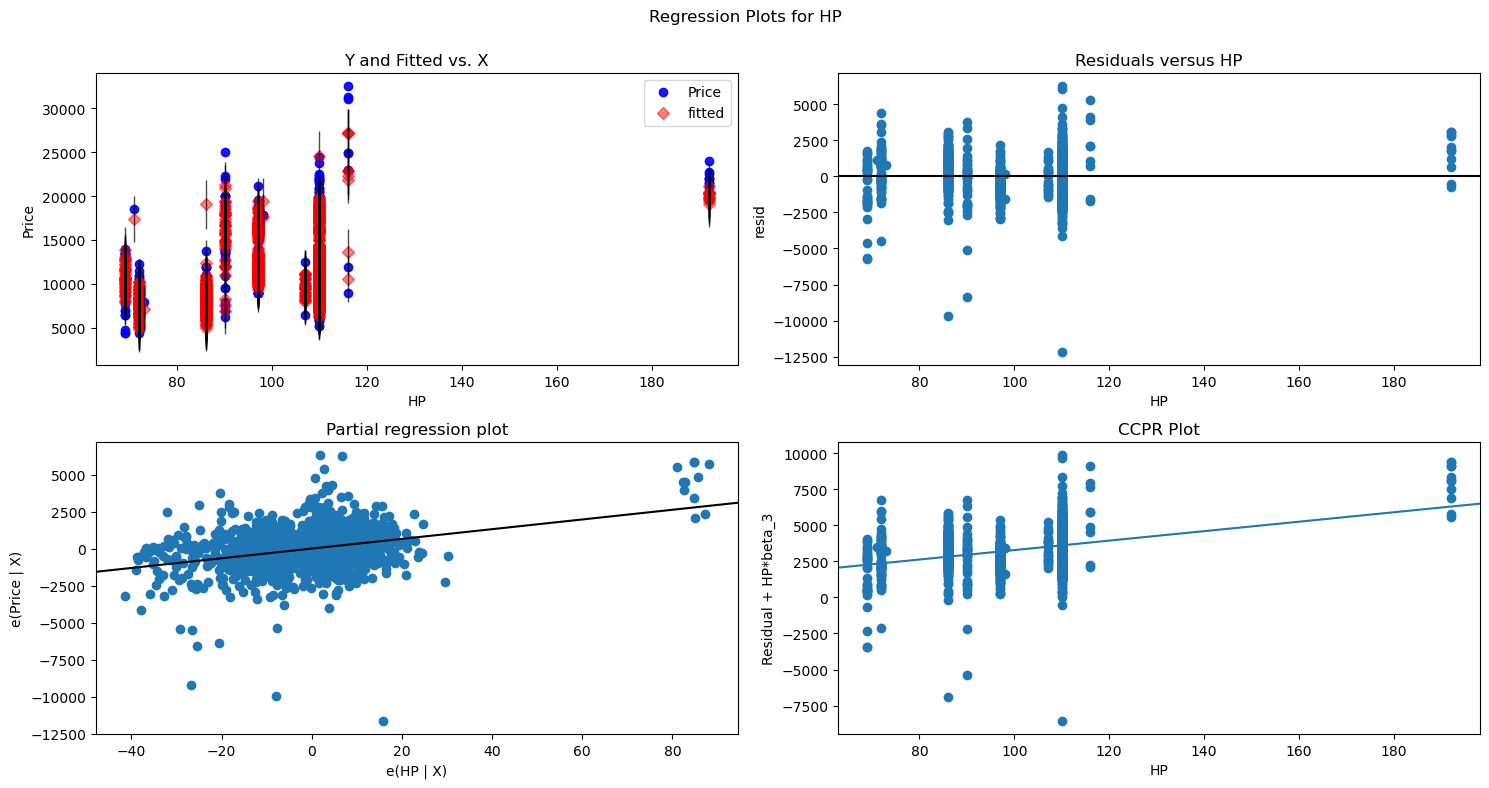

In [124]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

eval_env: 1


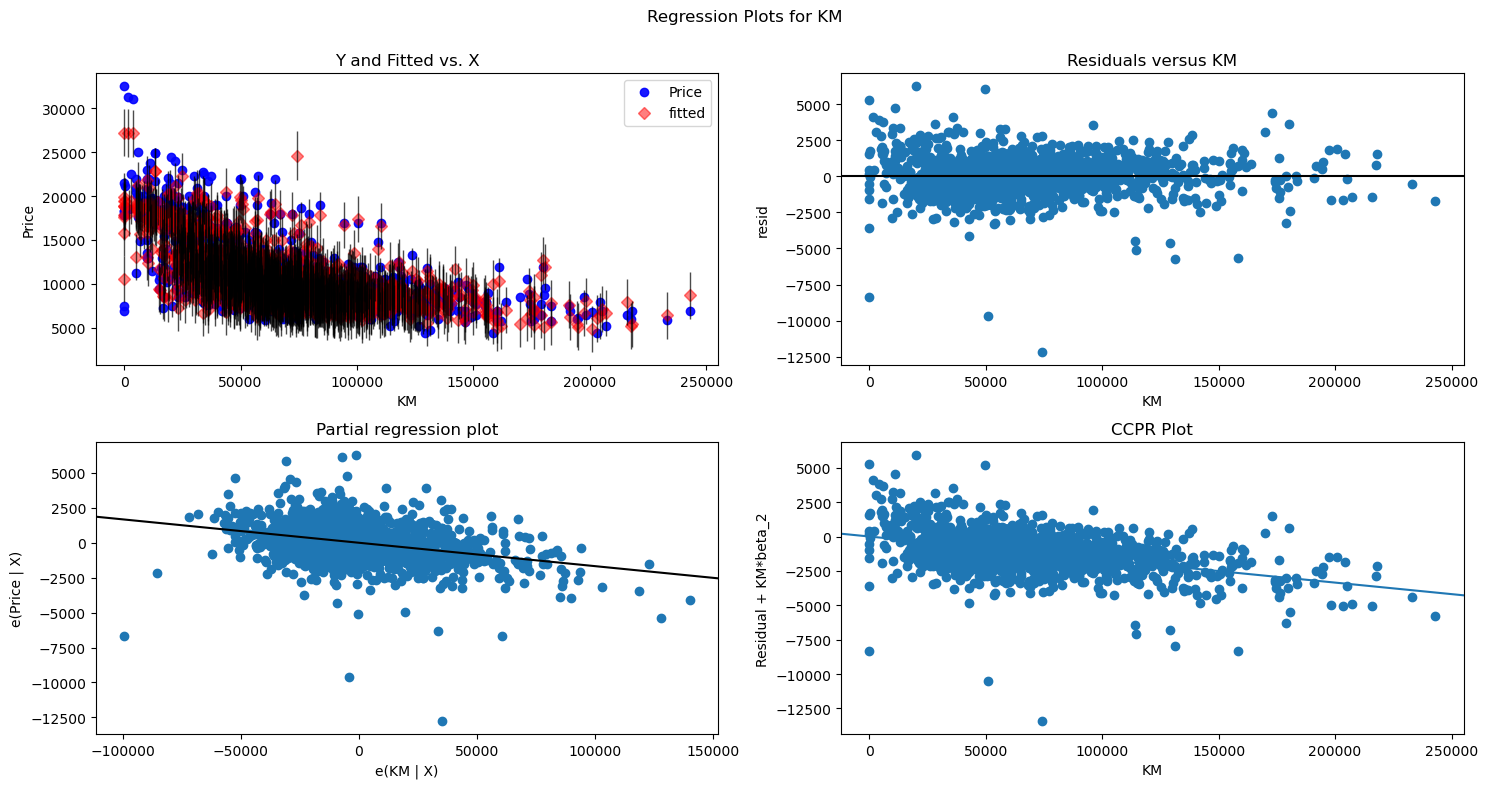

In [125]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

eval_env: 1


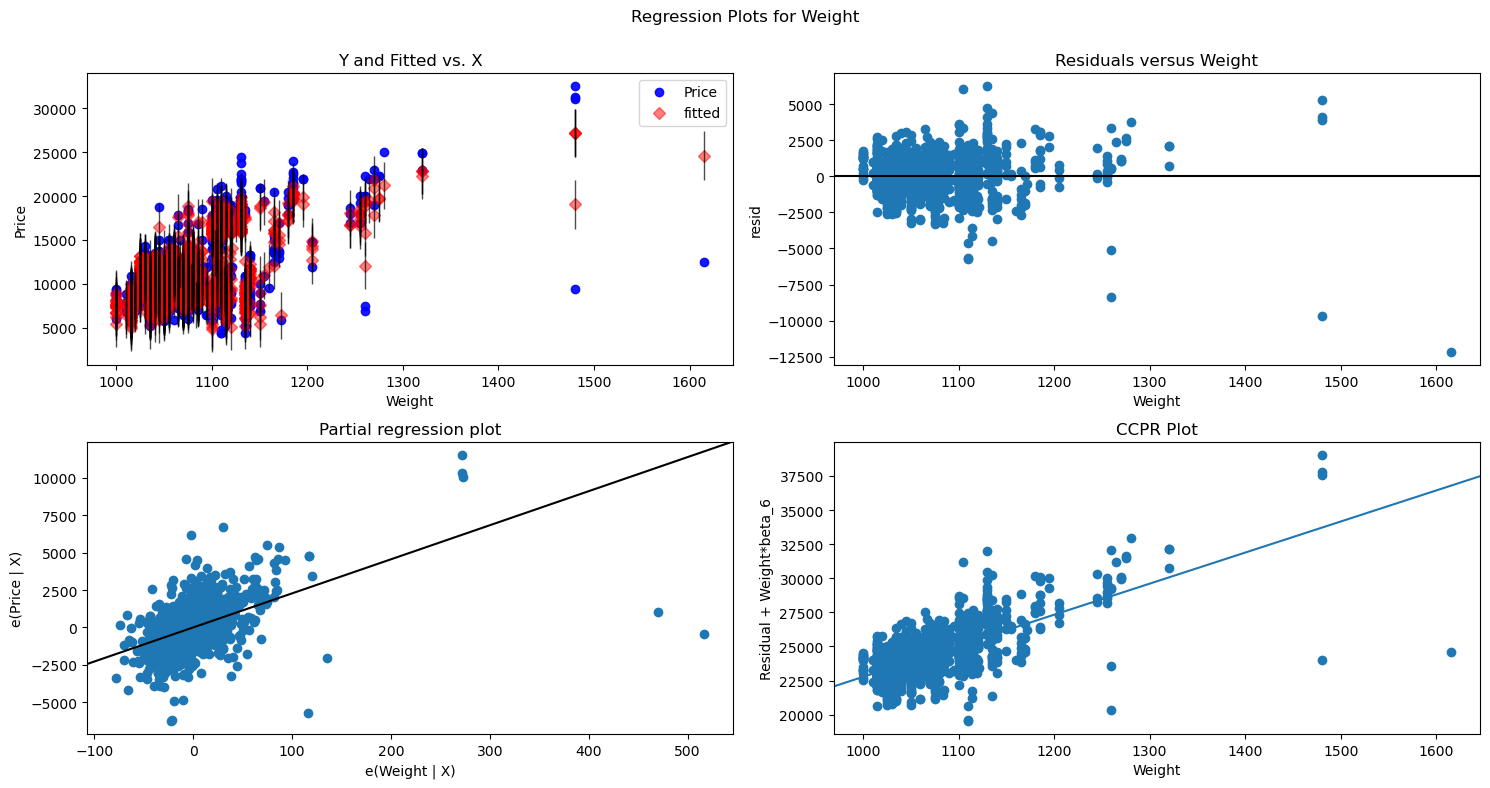

In [126]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

In [127]:
model_influence = model.get_influence()
(c, _) = model.get_influence().cooks_distance

In [128]:
c

array([5.39597088e-03, 2.75575755e-03, 3.71417360e-03, ...,
       1.49981269e-06, 8.83719320e-04, 1.17383897e-02])

<Figure size 2000x700 with 0 Axes>

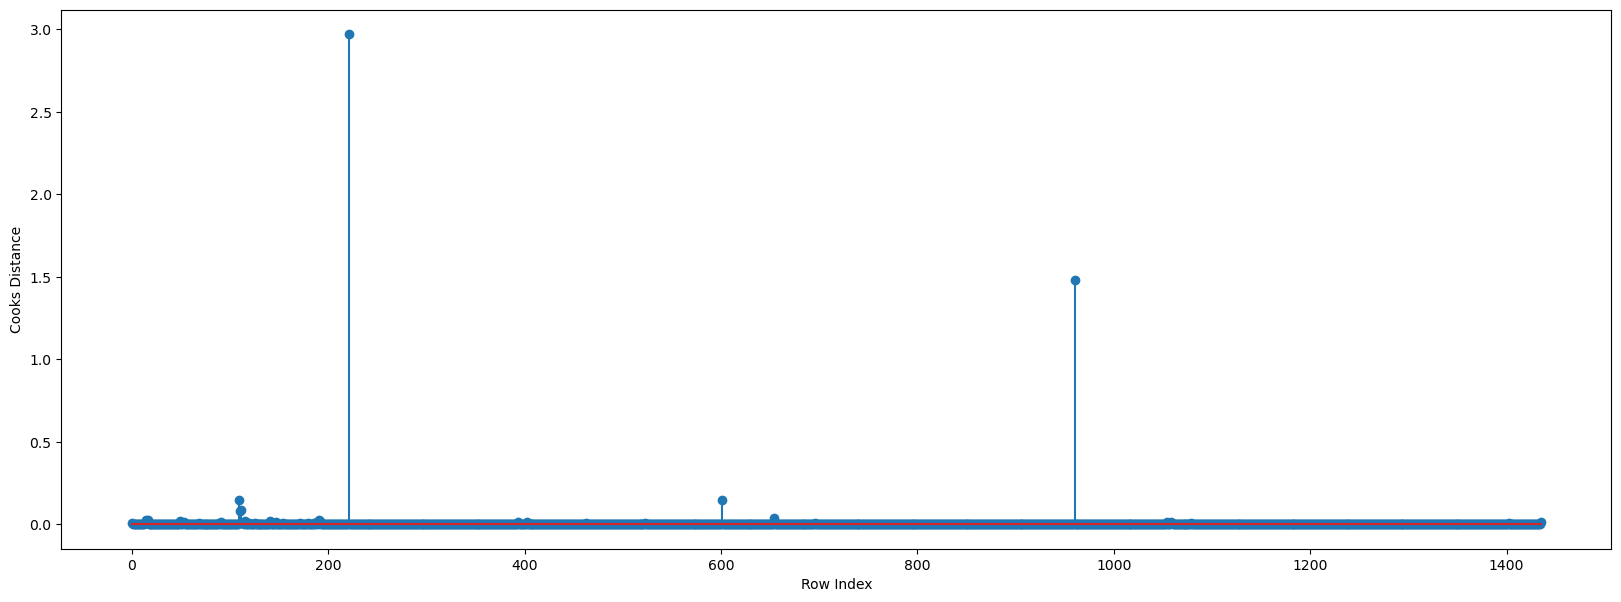

In [130]:
#plot the influence values using stem plot
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [131]:
#index and value of influencer where c is more tha 0.5
(np.argmax(c), np.max(c))

(221, 2.9708578917488286)

<Figure size 2000x1000 with 0 Axes>

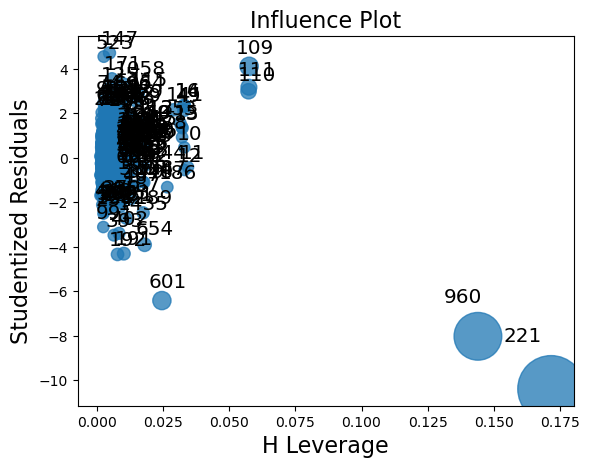

In [132]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize = (20,10))
influence_plot(model)
plt.show()

In [133]:
k = toyota.shape[1] #NO. of features (columns)
n = toyota.shape[0] #No. of observations (rows)

leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02298050139275766

In [134]:
toyota[toyota.index.isin([49])]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
49,21950,31,64982,Petrol,192,1,0,1800,5,1195


In [135]:
toyota1=toyota.drop(toyota.index[[49]],axis=0).reset_index(drop=True)

In [136]:
toyota1

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,1,0,1300,3,1025
1431,10845,72,19000,Petrol,86,0,0,1300,3,1015
1432,8500,71,17016,Petrol,86,0,0,1300,3,1015
1433,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [137]:
while np.max(c)>0.5 :
    model=smf.ols("Price~Age+KM+HP+CC+Doors+Weight",data=toyota1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota1=toyota1.drop(toyota.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota1
else:
    final_model=smf.ols("Price~Age+KM+HP+CC+Doors+Weight",data=toyota1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8881791872429081


In [138]:
final_model.rsquared

0.8881791872429081

In [139]:
toyota1

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,Petrol,86,1,0,1300,3,1025
1428,10845,72,19000,Petrol,86,0,0,1300,3,1015
1429,8500,71,17016,Petrol,86,0,0,1300,3,1015
1430,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [144]:
new_data=pd.DataFrame({'CC':7000,'Age':23,'KM':140000,'HP':90,'Doors':5,'Weight':1167},index=[0])
new_data

,CC,Age,KM,HP,Doors,Weight
0,7000,23,140000,90,5,1167


In [145]:
final_model.predict(new_data)

0   -2671.31175
dtype: float64

In [146]:
pred_y=final_model.predict(toyota1)
pred_y

0       16228.304756
1       15779.891139
2       16208.988151
3       15879.389780
4       15770.176849
            ...     
1427     9141.648093
1428     8499.948018
1429     8644.694643
1430     8756.887175
1431    11117.702305
Length: 1432, dtype: float64

In [149]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.883305
1,Final_Model,0.888179
